In [1]:
#Importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

C:\Users\acer\AppData\Local\Temp\ipykernel_10880\3049626098.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Visualizar dataset iris
dataset_iri = pd.read_csv('iris.csv')
dataset_iri.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Separar datos de entrenamiento y prueba
train_data, test_data = train_test_split(dataset_iri, test_size=0.2, random_state=0)

In [4]:
def calculate_mean_features(data, features):
    return [data[feature].mean() for feature in features]

def train_svm(train_data_O, test_data_O, class_label):
    # Preparar los datos de entrenamiento
    train_data = train_data_O.copy()
    train_data['species'] = train_data['species'].apply(lambda x: class_label if x == class_label else 'No-' + class_label)
    x_train = train_data.drop(columns=['species'])
    y_train = train_data['species']

    print(f"\n\nEntrenando clasificador para la clase {class_label}...\n")
    print(train_data.head())

    # Total de instancias y número de instancias de la clase r
    total_instances = len(train_data)
    num_class_r = sum(y_train == class_label)

    # Datos positivos y negativos
    positive_data = x_train[y_train == class_label]
    negative_data = x_train[y_train != class_label]

    # Features para calcular
    features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    # Vectores de soporte para clases positiva y negativa
    positive_support_vectors = calculate_mean_features(positive_data, features)
    negative_support_vectors = calculate_mean_features(negative_data, features)

    # Vector de soporte
    support_vector = [(positive + negative) / 2 for positive, negative in zip(positive_support_vectors, negative_support_vectors)]

    # Norma de los vectores de soporte
    positive_support_vectors_norm = np.linalg.norm(positive_support_vectors)
    negative_support_vectors_norm = np.linalg.norm(negative_support_vectors)
    support_vector_norm = np.linalg.norm(support_vector)

    print(f"Total de instancias: {total_instances}")
    print(f"\nNúmero de instancias de la clase {class_label}: {num_class_r}")
    
    # Imprimir vectores de soporte
    print(f"\nVector positivo:{positive_support_vectors}")
    print(f"\nNorma del vector positivo:{positive_support_vectors_norm}")
    print(f"\nVector negativo:{negative_support_vectors}")
    print(f"\nNorma del vector negativo:{negative_support_vectors_norm}")
    print(f"\nVector de soporte:{support_vector}")
    print(f"\nNorma del vector de soporte:{support_vector_norm}")

    return total_instances, num_class_r, support_vector

In [5]:
# Entrenar clasificador para la clase 'setosa'
total_instances_setosa, num_class_setosa, support_vector_setosa = train_svm(train_data, test_data, 'Iris-setosa')



Entrenando clasificador para la clase Iris-setosa...

     sepal_length  sepal_width  petal_length  petal_width         species
137           6.4          3.1           5.5          1.8  No-Iris-setosa
84            5.4          3.0           4.5          1.5  No-Iris-setosa
27            5.2          3.5           1.5          0.2     Iris-setosa
127           6.1          3.0           4.9          1.8  No-Iris-setosa
132           6.4          2.8           5.6          2.2  No-Iris-setosa
Total de instancias: 120

Número de instancias de la clase Iris-setosa: 39

Vector positivo:[5.02051282051282, 3.4025641025641025, 1.4615384615384615, 0.2384615384615384]

Norma del vector positivo:6.2430721630358486

Vector negativo:[6.295061728395062, 2.8851851851851853, 4.949382716049382, 1.7086419753086421]

Norma del vector negativo:8.68147121096599

Vector de soporte:[5.657787274453941, 3.1438746438746437, 3.205460588793922, 0.9735517568850902]

Norma del vector de soporte:7.28816062041829

In [6]:
# Entrenar clasificador para la clase 'versicolor'
total_instances_versicolor, num_class_versicolor, support_vector_versicolor = train_svm(train_data, test_data, 'Iris-versicolor')



Entrenando clasificador para la clase Iris-versicolor...

     sepal_length  sepal_width  petal_length  petal_width             species
137           6.4          3.1           5.5          1.8  No-Iris-versicolor
84            5.4          3.0           4.5          1.5     Iris-versicolor
27            5.2          3.5           1.5          0.2  No-Iris-versicolor
127           6.1          3.0           4.9          1.8  No-Iris-versicolor
132           6.4          2.8           5.6          2.2  No-Iris-versicolor
Total de instancias: 120

Número de instancias de la clase Iris-versicolor: 37

Vector positivo:[5.886486486486486, 2.7621621621621624, 4.216216216216216, 1.324324324324324]

Norma del vector positivo:7.861970304163584

Vector negativo:[5.878313253012049, 3.183132530120482, 3.637349397590362, 1.189156626506024]

Norma del vector negativo:7.702681580291533

Vector de soporte:[5.882399869749268, 2.972647346141322, 3.926782806903289, 1.256740475415174]

Norma del vector 

In [7]:
# Entrenar clasificador para la clase 'virginica'
total_instances_virginica, num_class_virginica, support_vector_virginica = train_svm(train_data, test_data, 'Iris-virginica')



Entrenando clasificador para la clase Iris-virginica...

     sepal_length  sepal_width  petal_length  petal_width            species
137           6.4          3.1           5.5          1.8     Iris-virginica
84            5.4          3.0           4.5          1.5  No-Iris-virginica
27            5.2          3.5           1.5          0.2  No-Iris-virginica
127           6.1          3.0           4.9          1.8     Iris-virginica
132           6.4          2.8           5.6          2.2     Iris-virginica
Total de instancias: 120

Número de instancias de la clase Iris-virginica: 44

Vector positivo:[6.638636363636365, 2.9886363636363638, 5.5659090909090905, 2.0318181818181817]

Norma del vector positivo:9.386749661883822

Vector negativo:[5.442105263157895, 3.0907894736842096, 2.8026315789473686, 0.7671052631578947]

Norma del vector negativo:6.900194455086432

Vector de soporte:[6.04037081339713, 3.0397129186602867, 4.18427033492823, 1.3994617224880384]

Norma del vector de 

In [8]:
# Calcular probabilidades a priori
p_setosa = num_class_setosa / total_instances_setosa
p_versicolor = num_class_versicolor / total_instances_versicolor
p_virginica = num_class_virginica / total_instances_virginica

print(f"\nProbabilidad a priori de la clase setosa: {p_setosa}")
print(f"Probabilidad a priori de la clase versicolor: {p_versicolor}")
print(f"Probabilidad a priori de la clase virginica: {p_virginica}")


Probabilidad a priori de la clase setosa: 0.325
Probabilidad a priori de la clase versicolor: 0.30833333333333335
Probabilidad a priori de la clase virginica: 0.36666666666666664


In [9]:
# Etapa de prueba
def Proba_pertenencia(test_data_O, class_label, p_class, support_vector):
    # Preparar los datos de prueba
    test_data = test_data_O.copy()
    test_data['species'] = test_data['species'].apply(lambda x: class_label if x == class_label else 'No-' + class_label)
    x_test = test_data.drop(columns=['species'])

    y_pred = []
    proyecciones = []
    probas = []

    # clasificación de 𝛼𝑖 realizada por el clasificador 𝑟 considerando 𝑃𝑟𝑜𝑦𝑐
    for i in range (len(x_test)):
        proyec = (np.dot(x_test.iloc[i], support_vector))/(np.linalg.norm(support_vector))
        proyecciones.append(proyec)
        if(class_label == 'Iris-setosa'):
            if(proyec > np.linalg.norm(support_vector)):
                y_pred.append(0)
            else:
                y_pred.append(1)
        elif(class_label == 'Iris-versicolor'):
            if(proyec > np.linalg.norm(support_vector)):
                y_pred.append(1)
            else:
                y_pred.append(0)
        else:
            if(proyec > np.linalg.norm(support_vector)):
                y_pred.append(1)
            else:
                y_pred.append(0)
            
        proba_pertenencia = p_class * y_pred[i]
        probas.append(proba_pertenencia)

    return y_pred, probas, proyecciones

In [10]:
y_pred_setosa, proba_per_setosa, proyec_setosa = Proba_pertenencia(test_data, 'Iris-setosa', p_setosa, support_vector_setosa)
y_pred_versicolor, proba_per_versicolor, proyec_versicolor = Proba_pertenencia(test_data, 'Iris-versicolor', p_versicolor, support_vector_versicolor)
y_pred_virginica, proba_per_virginica, proyec_virginica = Proba_pertenencia(test_data, 'Iris-virginica', p_virginica, support_vector_virginica)

In [11]:
def final_clasi(proba_per_setosa, proba_per_versicolor, proba_per_virginica):
    if proba_per_setosa == proba_per_versicolor and proba_per_setosa == proba_per_virginica and proba_per_versicolor == proba_per_virginica:
        return "No_clasificado"
    else:
        final = max(proba_per_setosa, proba_per_versicolor, proba_per_virginica)
        if final == proba_per_setosa:
            return "Iris-setosa"
        elif final == proba_per_versicolor:
            return "Iris-versicolor"
        else:
            return "Iris-virginica"

#Juntar Proyecciones y Probabilidades
Proyec = [proyec_setosa, proyec_versicolor, proyec_virginica]
Probas = [proba_per_setosa, proba_per_versicolor, proba_per_virginica]
#Guardar y_pred
y_predic = []
for i in range (len(test_data)):
    print(f"Proyección de la instancia {i+1}: {Proyec[0][i]}, {Proyec[1][i]}, {Proyec[2][i]}")
    print(f"\nProbabilidad de pertenencia a las clases para la instancia {i+1}: {Probas[0][i]}, {Probas[1][i]}, {Probas[2][i]}\n")
    y_pred = final_clasi(Probas[0][i], Probas[1][i], Probas[2][i])
    print(f"Clasificación final para la instancia {i+1}: {y_pred}\n\n")
    y_predic.append(y_pred)



Proyección de la instancia 1: 8.274020230168045, 8.423252551327478, 8.45209649610535

Probabilidad de pertenencia a las clases para la instancia 1: 0.0, 0.30833333333333335, 0.36666666666666664

Clasificación final para la instancia 1: Iris-virginica


Proyección de la instancia 2: 7.499648377970512, 7.563228246497816, 7.563128402432174

Probabilidad de pertenencia a las clases para la instancia 2: 0.0, 0.0, 0.0

Clasificación final para la instancia 2: No_clasificado


Proyección de la instancia 3: 6.723844498180958, 6.507051856607232, 6.455966975301881

Probabilidad de pertenencia a las clases para la instancia 3: 0.325, 0.0, 0.0

Clasificación final para la instancia 3: Iris-setosa


Proyección de la instancia 4: 9.929237596631308, 10.105605639642409, 10.129784875576211

Probabilidad de pertenencia a las clases para la instancia 4: 0.0, 0.30833333333333335, 0.36666666666666664

Clasificación final para la instancia 4: Iris-virginica


Proyección de la instancia 5: 6.034583166676581,


Reporte de clasificación:

                 precision    recall  f1-score   support

    Iris-setosa       0.92      1.00      0.96        11
Iris-versicolor       1.00      0.15      0.27        13
 Iris-virginica       0.43      1.00      0.60         6
 No_clasificado       0.00      0.00      0.00         0

       accuracy                           0.63        30
      macro avg       0.59      0.54      0.46        30
   weighted avg       0.86      0.63      0.59        30


Matriz de confusión:



c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

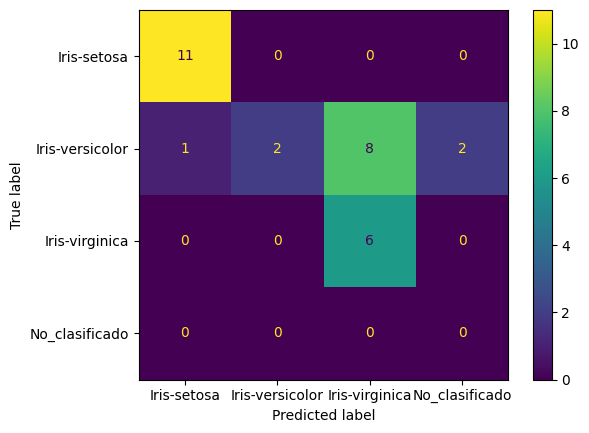

In [12]:
# Reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(test_data['species'], y_predic))

# Matriz de confusión
print("\nMatriz de confusión:\n")
cm = confusion_matrix(test_data['species'], y_predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'No_clasificado'])
disp.plot()
